# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
!pip install pandas ydata-profiling

random.seed(42)
np.random.seed(42)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 108.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a481b637ffc712e25e4eb0001fadd8a51807885e3ef5316aa941e3fa913e237d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


### **Задание 0**
Для чего фиксируем сиды в домашках?

Чтобы результаты были воспроизводимы

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_train_original = df_train.copy()
df_test_original = df_test.copy()

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [ ]:
#создаем копию признака, чтобы потом не было колизий

df_train['torque_copy'] = df_train['torque']
df_test['torque_copy'] = df_test['torque']
del df_train['torque']
del df_test['torque']

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [ ]:
missing_columns = df_train.columns[df_train.isnull().any()].tolist()
print("Колонки с пропущенными значениями:", missing_columns)

duplicates = df_train.duplicated().sum()
print("Количество явных дубликатов:", duplicates)

Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'seats', 'torque_copy']
Количество явных дубликатов: 985


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  seats          6797 non-null   float64
 12  torque_copy    6796 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [ ]:
# Посмотрим более пристально на дубликаты
df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power  seats          torque_copy  
254   1197 CC      82 bhp    5.0       114Nm@ 4000rpm  
258   1197 CC    85.8 bhp    5.0       114Nm@ 4000rpm  
324   1999 CC     177 bhp    5.0  430Nm@ 1750-2500rpm  
325   2487 CC  214.56 bhp    5.0  202Nm@ 3600-5200rpm  
326   1999 CC     177 bhp    5.0  430Nm@ 1750-2500rpm  
...       ...         ...    ...                  ...  
6880  1461 CC  108.45 bhp    5.0       240Nm@ 1750rpm  
6881  1248 CC   88.50 bhp    5.0       200Nm@ 1750rpm  
6989  1248 CC      74 bhp    5.0       190Nm@ 2000rpm  
6997  1396 CC      70 bhp    5.0  140Nm@ 1800-3000rpm  
6998  1396 CC      70 bhp    5.0  140Nm@ 1800-3000rpm  

[985 rows x 13 columns]

Дубликаты есть, но полных дубликатов, как будто не так много. Основные пропуски находятся в характеристиках двигателя - mileage, torque etc. Посмотрим на попуски тоже более детально

In [ ]:
df_train[df_train['mileage'].isnull()]

name  year  selling_price  km_driven  \
12                    Maruti Swift 1.3 VXi  2007         200000      80000   
28                      Fiat Palio 1.2 ELX  2003          70000      50000   
69                         Tata Indica DLS  2003          50000      70000   
78             Maruti Swift VDI BSIV W ABS  2015         475000      78000   
107                  Maruti Swift VDI BSIV  2010         300000     120000   
...                                    ...   ...            ...        ...   
6764                Toyota Qualis Fleet A3  2000         200000     100000   
6889             Hyundai Santro LS zipPlus  2000         140000      50000   
6901  Hyundai Santro Xing XS eRLX Euro III  2006         145000      80000   
6949             Ford Figo Aspire Facelift  2017         580000     165000   
6976                  Maruti Swift 1.3 VXi  2006         130000     100000   

        fuel seller_type transmission         owner mileage engine max_power  \
12    Petrol  Individual       Manual  Second Owner     NaN    NaN       NaN   
28    Petrol  Individual       Manual  Second Owner     NaN    NaN       NaN   
69    Diesel  Individual       Manual   First Owner     NaN    NaN       NaN   
78    Diesel      Dealer       Manual   First Owner     NaN    NaN       NaN   
107   Diesel  Individual       Manual  Second Owner     NaN    NaN       NaN   
...      ...         ...          ...           ...     ...    ...       ...   
6764  Diesel  Individual       Manual   First Owner     NaN    NaN       NaN   
6889  Petrol  Individual       Manual  Second Owner     NaN    NaN       NaN   
6901  Petrol  Individual       Manual  Second Owner     NaN    NaN       NaN   
6949  Diesel  Individual       Manual   First Owner     NaN    NaN       NaN   
6976  Petrol  Individual       Manual  Second Owner     NaN    NaN       NaN   

      seats torque_copy  
12      NaN         NaN  
28      NaN         NaN  
69      NaN         NaN  
78      NaN         NaN  
107     NaN         NaN  
...     ...         ...  
6764    NaN         NaN  
6889    NaN         NaN  
6901    NaN         NaN  
6949    NaN         NaN  
6976    NaN         NaN  

[202 rows x 13 columns]

Видим, что в большинстве случаев пропуски присутсвуют сразу в нескольких признаках, поэтому наверное в будущем эти наблюдения можно будет убрать

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Выводы**
1. Есть признаки, которые имеют неправильный тип данных - mileage должен быть float, также нужно преобразовать engine - в котором присутсвуют единицы измерения (их нужно убрать и переделать в int), и то же самое с max_power и torque
2. Есть некоторое кол-во дубликатов, которые нужно очистить
3. Также есть пропуски в небольшом количестве, которые тоже нужно убрать, потому что нет закономерности для их замены
4. Есть скоррелированные признаки - (km_driven, year), которые могут привести к инфляции дисперсии
5. Есть некоторые признаки, которые сильно скоррелированы с целевой переменную - year, transmition

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [ ]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [ ]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power     torque_copy  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [ ]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [ ]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power     torque_copy  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

**Вывод**:
медианы и средние по признакам сильно не отличаются друг от друга, поэтому тренировочная выборка может быть хорошей аппроксимацией на тестовую

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [ ]:
duplicates = df_train.duplicated(keep=False)
num_duplicates = duplicates.sum()
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")

Количество объектов с одинаковым признаковым описанием: 1478


In [ ]:
duplicate_entries = df_train[duplicates]
print("Объекты с одинаковым признаковым описанием:")
duplicate_entries

Объекты с одинаковым признаковым описанием:


name  year  selling_price  km_driven  \
28                  Fiat Palio 1.2 ELX  2003          70000      50000   
29           Maruti Omni 8 Seater BSIV  2012         150000      35000   
31    Maruti Alto 800 CNG LXI Optional  2019         330000      10000   
32          Maruti Alto K10 VXI Airbag  2019         366000      15000   
33    Hyundai Verna VTVT 1.6 SX Option  2019        1149000       5000   
...                                ...   ...            ...        ...   
6880     Renault Captur 1.5 Diesel RXT  2018        1265000      12000   
6881          Maruti Ciaz Alpha Diesel  2019        1025000      32000   
6989            Maruti Swift Dzire VDI  2015         625000      50000   
6997                   Tata Indigo CR4  2013         290000      25000   
6998                   Tata Indigo CR4  2013         290000      25000   

        fuel seller_type transmission         owner      mileage   engine  \
28    Petrol  Individual       Manual  Second Owner          NaN      NaN   
29    Petrol  Individual       Manual  Second Owner    14.0 kmpl   796 CC   
31       CNG  Individual       Manual  Second Owner  33.44 km/kg   796 CC   
32    Petrol  Individual       Manual   First Owner   23.95 kmpl   998 CC   
33    Petrol  Individual       Manual   First Owner    17.0 kmpl  1591 CC   
...      ...         ...          ...           ...          ...      ...   
6880  Diesel  Individual       Manual   First Owner   20.37 kmpl  1461 CC   
6881  Diesel  Individual       Manual   First Owner   28.09 kmpl  1248 CC   
6989  Diesel  Individual       Manual   First Owner   26.59 kmpl  1248 CC   
6997  Diesel  Individual       Manual   First Owner   23.57 kmpl  1396 CC   
6998  Diesel  Individual       Manual   First Owner   23.57 kmpl  1396 CC   

       max_power  seats          torque_copy  
28           NaN    NaN                  NaN  
29        35 bhp    5.0      6.1kgm@ 3000rpm  
31      40.3 bhp    4.0        60Nm@ 3500rpm  
32      67.1 bhp    5.0        90Nm@ 3500rpm  
33     121.3 bhp    5.0       151Nm@ 4850rpm  
...          ...    ...                  ...  
6880  108.45 bhp    5.0       240Nm@ 1750rpm  
6881   88.50 bhp    5.0       200Nm@ 1750rpm  
6989      74 bhp    5.0       190Nm@ 2000rpm  
6997      70 bhp    5.0  140Nm@ 1800-3000rpm  
6998      70 bhp    5.0  140Nm@ 1800-3000rpm  

[1478 rows x 13 columns]

In [ ]:
df_train = df_train.drop_duplicates(subset=df_train.columns, keep='first')
df_train.reset_index(drop=True, inplace=True)

print("DataFrame после удаления дубликатов и обновления индексов:")
df_train

DataFrame после удаления дубликатов и обновления индексов:


name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6009            Hyundai Santro Xing GLS  2008         120000     191000   
6010  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6011                  Hyundai i20 Magna  2013         320000     110000   
6012              Hyundai Verna CRDi SX  2007         135000     119000   
6013             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
6009  Petrol  Individual       Manual           First Owner  17.92 kmpl   
6010  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
6011  Petrol  Individual       Manual           First Owner   18.5 kmpl   
6012  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
6013  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power  seats                torque_copy  
0     1248 CC      74 bhp    5.0             190Nm@ 2000rpm  
1     1498 CC  103.52 bhp    5.0        250Nm@ 1500-2500rpm  
2     1396 CC      90 bhp    5.0   22.4 kgm at 1750-2750rpm  
3     1298 CC    88.2 bhp    5.0      11.5@ 4,500(kgm@ rpm)  
4     1197 CC   81.86 bhp    5.0          113.75nm@ 4000rpm  
...       ...         ...    ...                        ...  
6009  1086 CC    62.1 bhp    5.0            96.1Nm@ 3000rpm  
6010   998 CC    67.1 bhp    5.0              90Nm@ 3500rpm  
6011  1197 CC   82.85 bhp    5.0           113.7Nm@ 4000rpm  
6012  1493 CC     110 bhp    5.0  24@ 1,900-2,750(kgm@ rpm)  
6013  1248 CC    73.9 bhp    5.0             190Nm@ 2000rpm  

[6014 rows x 13 columns]

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [ ]:
import re
def extract_number_from(value):
    if pd.notnull(value):
        result = re.search(r'(\d+)', value)
        if result is not None:
            return int(result.group(0))
    return np.nan

def parse_torque(value):
  if pd.isnull(value):
        return np.nan, np.nan
  torque_match = re.search(r'(\d+\.?\d*)\s*(?:Nm|kgm)', value, re.IGNORECASE)
  if torque_match:
      torque = float(torque_match.group(1))
  else:
      torque = np.nan

  rpm_match = re.search(r'(\d+)(?!.*\d)', value, re.IGNORECASE)
  if rpm_match:
    max_torque_rpm = int(rpm_match.group(1).replace(',', ''))

  else:
      max_torque_rpm = np.nan

  return torque, max_torque_rpm


def fix_ds(df):
  df[['torque', 'max_torque_rpm']] = df['torque_copy'].apply(lambda x : pd.Series(parse_torque(x)))
  for i in ['mileage', 'engine', 'max_power']:
    df[i] = df[i].apply(extract_number_from)
  return df

In [ ]:
df_train_fixed = fix_ds(df_train)
df_test_fixed = fix_ds(df_test)

df_train_w_nulls = df_train_fixed.copy()
df_test_w_nulls = df_test_fixed.copy()
del df_train_fixed['torque_copy']
del df_test_fixed['torque_copy']

<ipython-input-22-f7b499d9adde>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['torque', 'max_torque_rpm']] = df['torque_copy'].apply(lambda x : pd.Series(parse_torque(x)))
<ipython-input-22-f7b499d9adde>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['torque', 'max_torque_rpm']] = df['torque_copy'].apply(lambda x : pd.Series(parse_torque(x)))
<ipython-input-22-f7b499d9adde>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [ ]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.0  1497.0      108.0   
2  Petrol  Individual    Automatic   First Owner     12.0  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.0  1498.0       98.0   
4  Petrol  Individual       Manual  Second Owner     16.0  1172.0       65.0   

   seats  torque  max_torque_rpm  
0    7.0   260.0          2200.0  
1    5.0   260.0          2750.0  
2    5.0   172.0          4300.0  
3    5.0   200.0          1750.0  
4    5.0    96.0          3000.0

In [ ]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  \
0  Individual       Manual   First Owner     23.0  1248.0       74.0    5.0   
1  Individual       Manual  Second Owner     21.0  1498.0      103.0    5.0   
2  Individual       Manual   First Owner     23.0  1396.0       90.0    5.0   
3  Individual       Manual   First Owner     16.0  1298.0       88.0    5.0   
4  Individual       Manual   First Owner     20.0  1197.0       81.0    5.0   

   torque  max_torque_rpm  
0  190.00          2000.0  
1  250.00          2500.0  
2   22.40          2750.0  
3     NaN           500.0  
4  113.75          4000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Будем заполнять медиану, посчитанную на тренировочной выборке и для тренировочного и для тестового набора данных, чтобы не было эффекта "подглядывания" в тестовые данные

Также медиану лучше использовать потому что в данных есть выбросы, с помощью медианы можно их обойти

In [ ]:
mis = df_train_fixed.columns[df_train_fixed.isnull().any()].tolist()
for col in mis:
  med = df_train_fixed[col].median()
  df_train_fixed[col] = df_train_fixed[col].fillna(med)
  df_test_fixed[col] = df_test_fixed[col].fillna(med)

<ipython-input-26-0b92655ee070>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_fixed[col] = df_train_fixed[col].fillna(med)


In [ ]:
df_train_fixed.isnull().any() #пропусков не осталось!

name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage           False
engine            False
max_power         False
seats             False
torque            False
max_torque_rpm    False
dtype: bool

In [ ]:
df_test_fixed.isnull().any()

name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage           False
engine            False
max_power         False
seats             False
torque            False
max_torque_rpm    False
dtype: bool

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [ ]:
for col in ['engine', 'seats']:
  df_test_fixed[col] = df_test_fixed[col].apply(lambda x: int(x))
  df_train_fixed[col] = df_train_fixed[col].apply(lambda x: int(x))

<ipython-input-29-0089af546e1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_fixed[col] = df_train_fixed[col].apply(lambda x: int(x))


In [ ]:
df_test_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   int64  
 10  max_power       1000 non-null   float64
 11  seats           1000 non-null   int64  
 12  torque          1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 109.5+ KB


In [ ]:
df_train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6014 non-null   object 
 1   year            6014 non-null   int64  
 2   selling_price   6014 non-null   int64  
 3   km_driven       6014 non-null   int64  
 4   fuel            6014 non-null   object 
 5   seller_type     6014 non-null   object 
 6   transmission    6014 non-null   object 
 7   owner           6014 non-null   object 
 8   mileage         6014 non-null   float64
 9   engine          6014 non-null   int64  
 10  max_power       6014 non-null   float64
 11  seats           6014 non-null   int64  
 12  torque          6014 non-null   float64
 13  max_torque_rpm  6014 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 657.9+ KB


In [ ]:
# посмотрим на уникальные значения по seats
df_train_fixed.seats.value_counts()

seats
5     4762
7      820
8      196
4       97
9       69
6       49
10      18
2        2
14       1
Name: count, dtype: int64

Можно рассматривать seats как категориальную переменную, потому что она имеет небольшое количсетво уникальных значений


### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [ ]:
df_train_fixed.describe() # новый дескрайб

year  selling_price     km_driven      mileage       engine  \
count  6014.000000   6.014000e+03  6.014000e+03  6014.000000  6014.000000   
mean   2013.447456   5.219820e+05  7.376415e+04    19.029930  1425.702694   
std       4.079920   5.338426e+05  5.961075e+04     4.004584   484.728537   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    17.000000  1197.000000   
50%    2014.000000   4.099990e+05  7.000000e+04    19.000000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.000000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats       torque  max_torque_rpm  
count  6014.000000  6014.000000  6014.000000     6014.000000  
mean     87.361490     5.423844   168.651430     2902.966079  
std      31.528995     0.978959    84.235662     1035.841647  
min       0.000000     2.000000     4.800000        0.000000  
25%      68.000000     5.000000   111.700000     2000.000000  
50%      81.000000     5.000000   160.000000     2800.000000  
75%      99.000000     5.000000   200.000000     3750.000000  
max     400.000000    14.000000   789.000000     5300.000000

In [ ]:
df_train_w_nulls.describe() #старый дескрайб

year  selling_price     km_driven      mileage       engine  \
count  6014.000000   6.014000e+03  6.014000e+03  5824.000000  5824.000000   
mean   2013.447456   5.219820e+05  7.376415e+04    19.030907  1431.500000   
std       4.079920   5.338426e+05  5.961075e+04     4.069389   491.492001   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.000000  1197.000000   
50%    2014.000000   4.099990e+05  7.000000e+04    19.000000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.000000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats       torque  max_torque_rpm  
count  5826.000000  5824.000000  5487.000000     5823.000000  
mean     87.566770     5.437672   169.482358     2906.343466  
std      32.012697     0.991755    88.144161     1052.525115  
min       0.000000     2.000000     4.800000        0.000000  
25%      67.000000     5.000000   108.000000     2000.000000  
50%      81.000000     5.000000   160.000000     2800.000000  
75%     100.000000     5.000000   200.000000     4000.000000  
max     400.000000    14.000000   789.000000     5300.000000

**Ответ:** Распределение действительно немного поменялось, но нельзя сказать, что мы сдвинули распределение, т.к. средние значения практически не поменялись и дисперсия немного снизилась. Сдвиг распределения наверное мог бы возникнуть только в случае экстремально большого кол-ва пропусков и большому хвосту распределения или если распределение было бы бимодельно. Тогда много пропусков заполнились медианой и среднее уехало бы сильно в сторону основного скопления наблюдений


## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

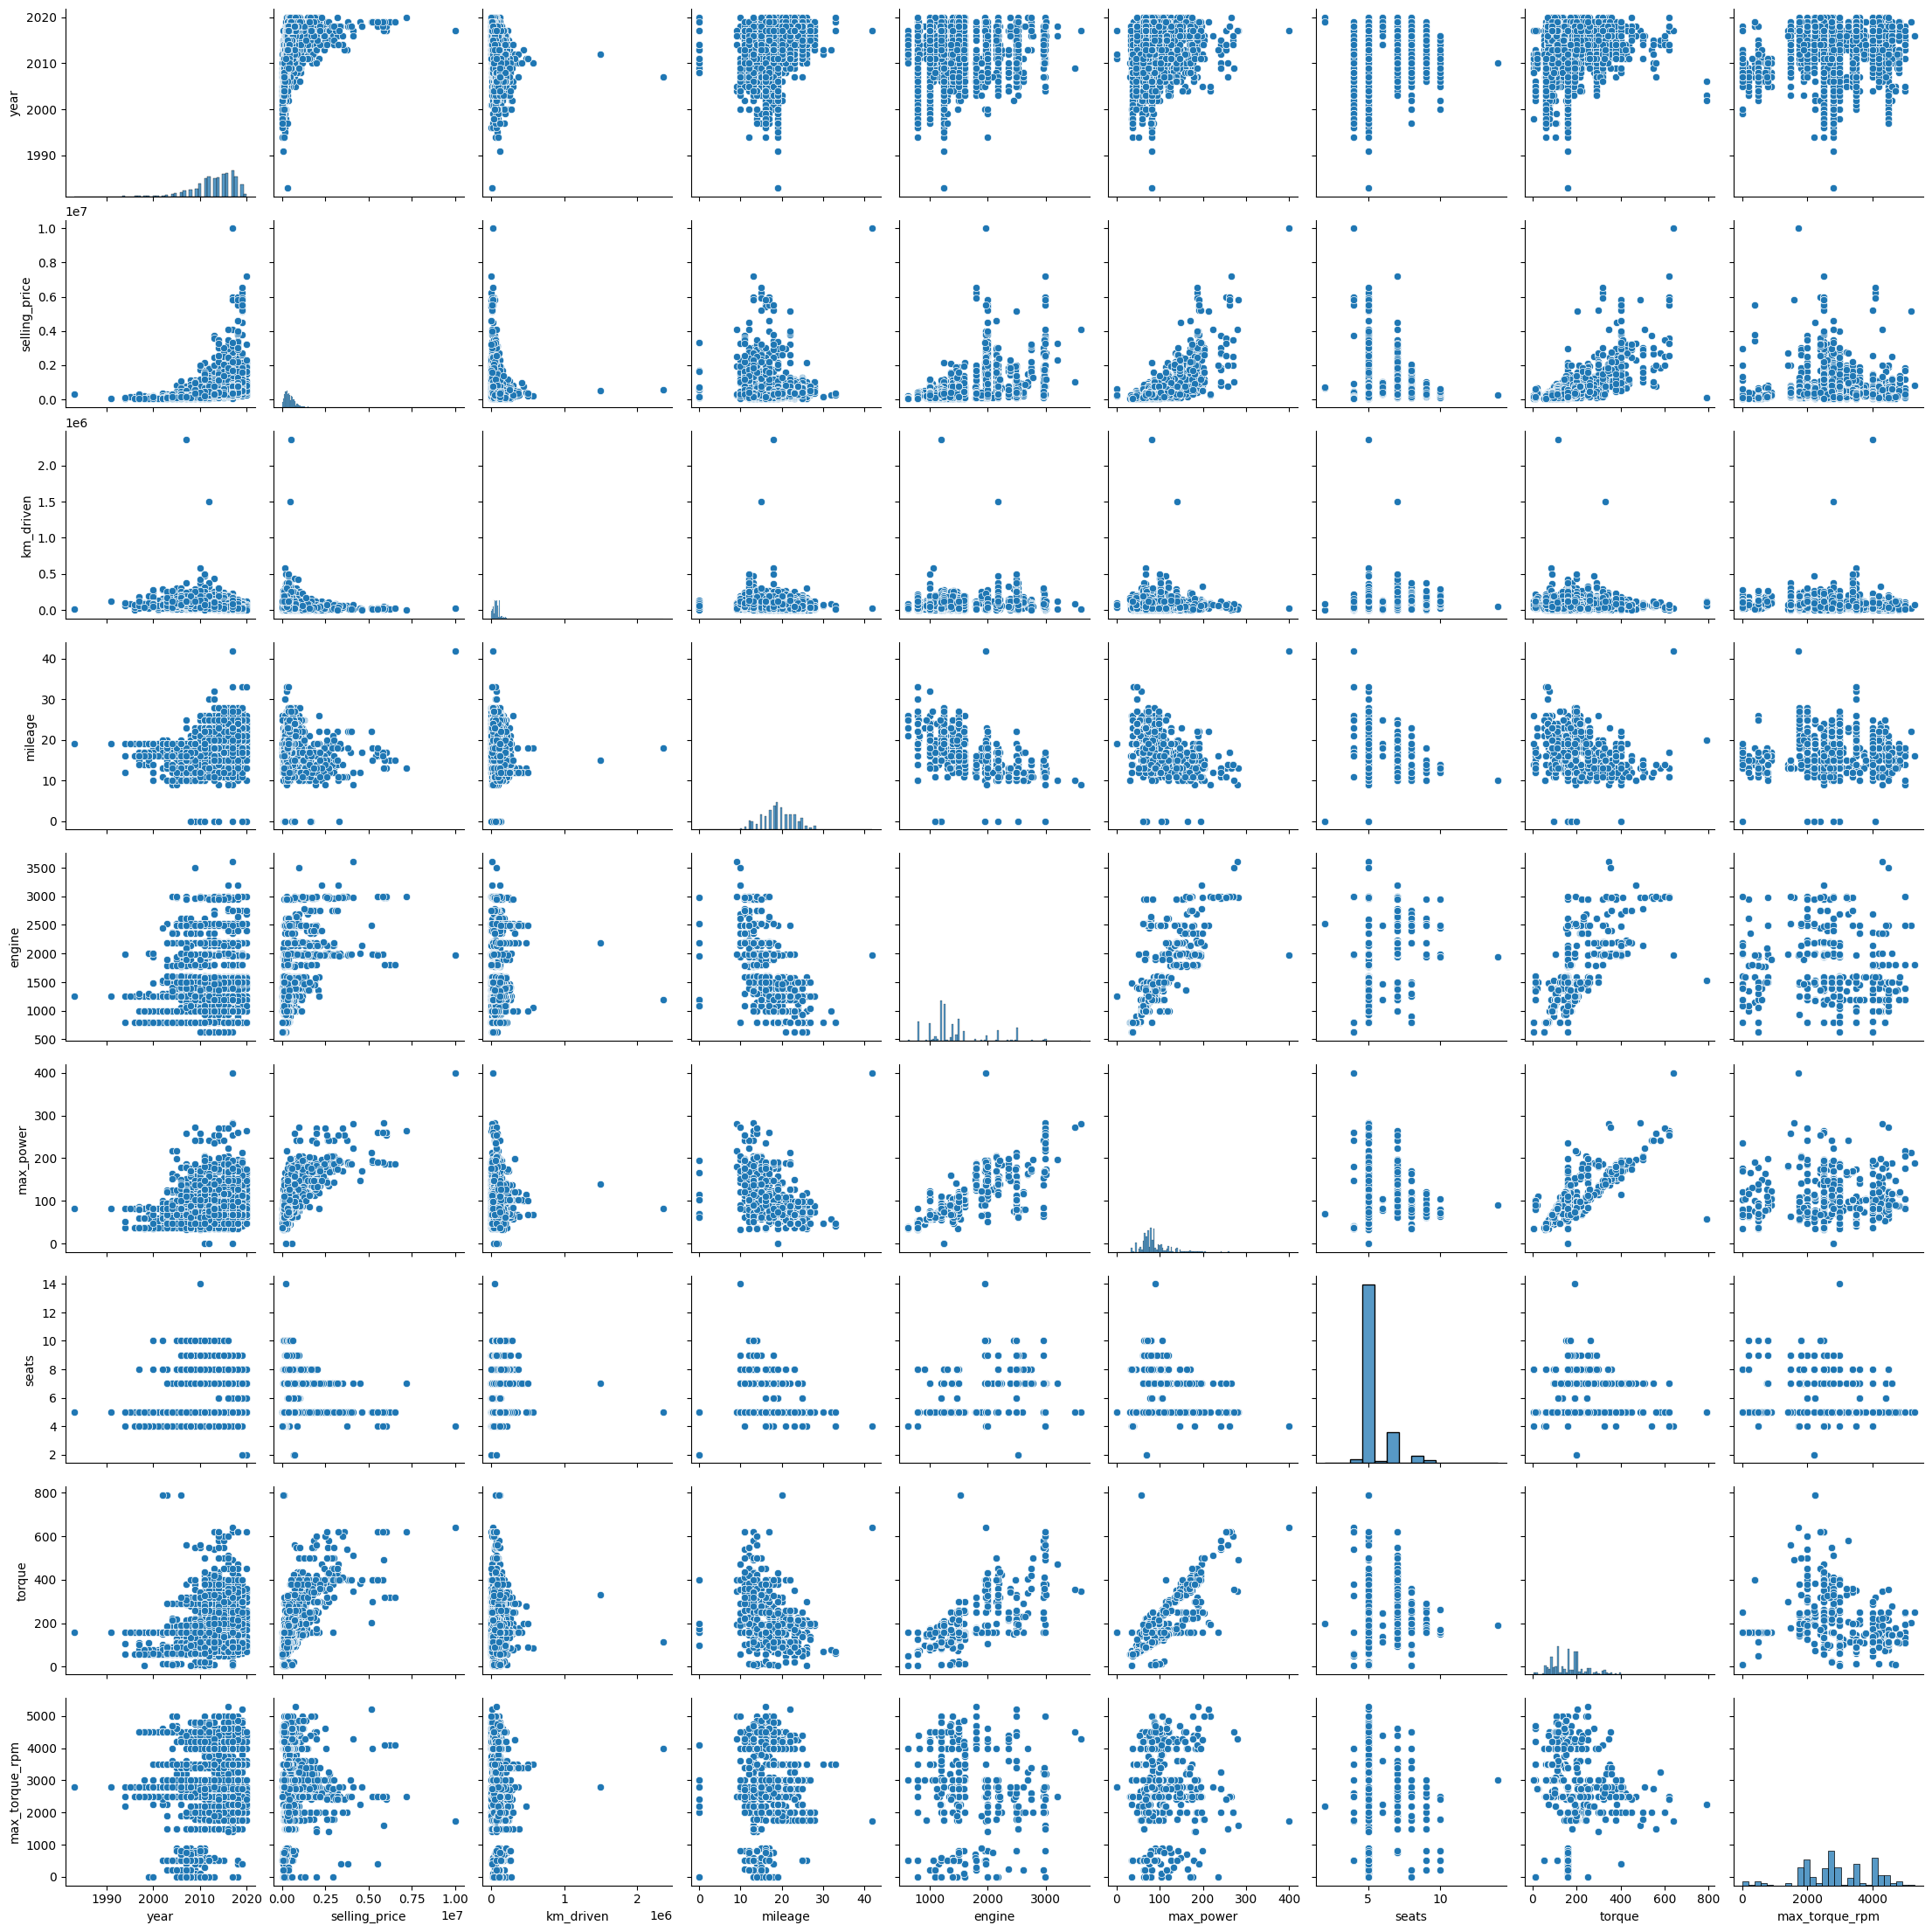

In [ ]:
# step 1

sns.pairplot(df_train_fixed)
plt.show()

По признаку km_driven видны два явных выброса, которые мешают парвильно интерпретировать данные, поэтому удалим их из наблюдений

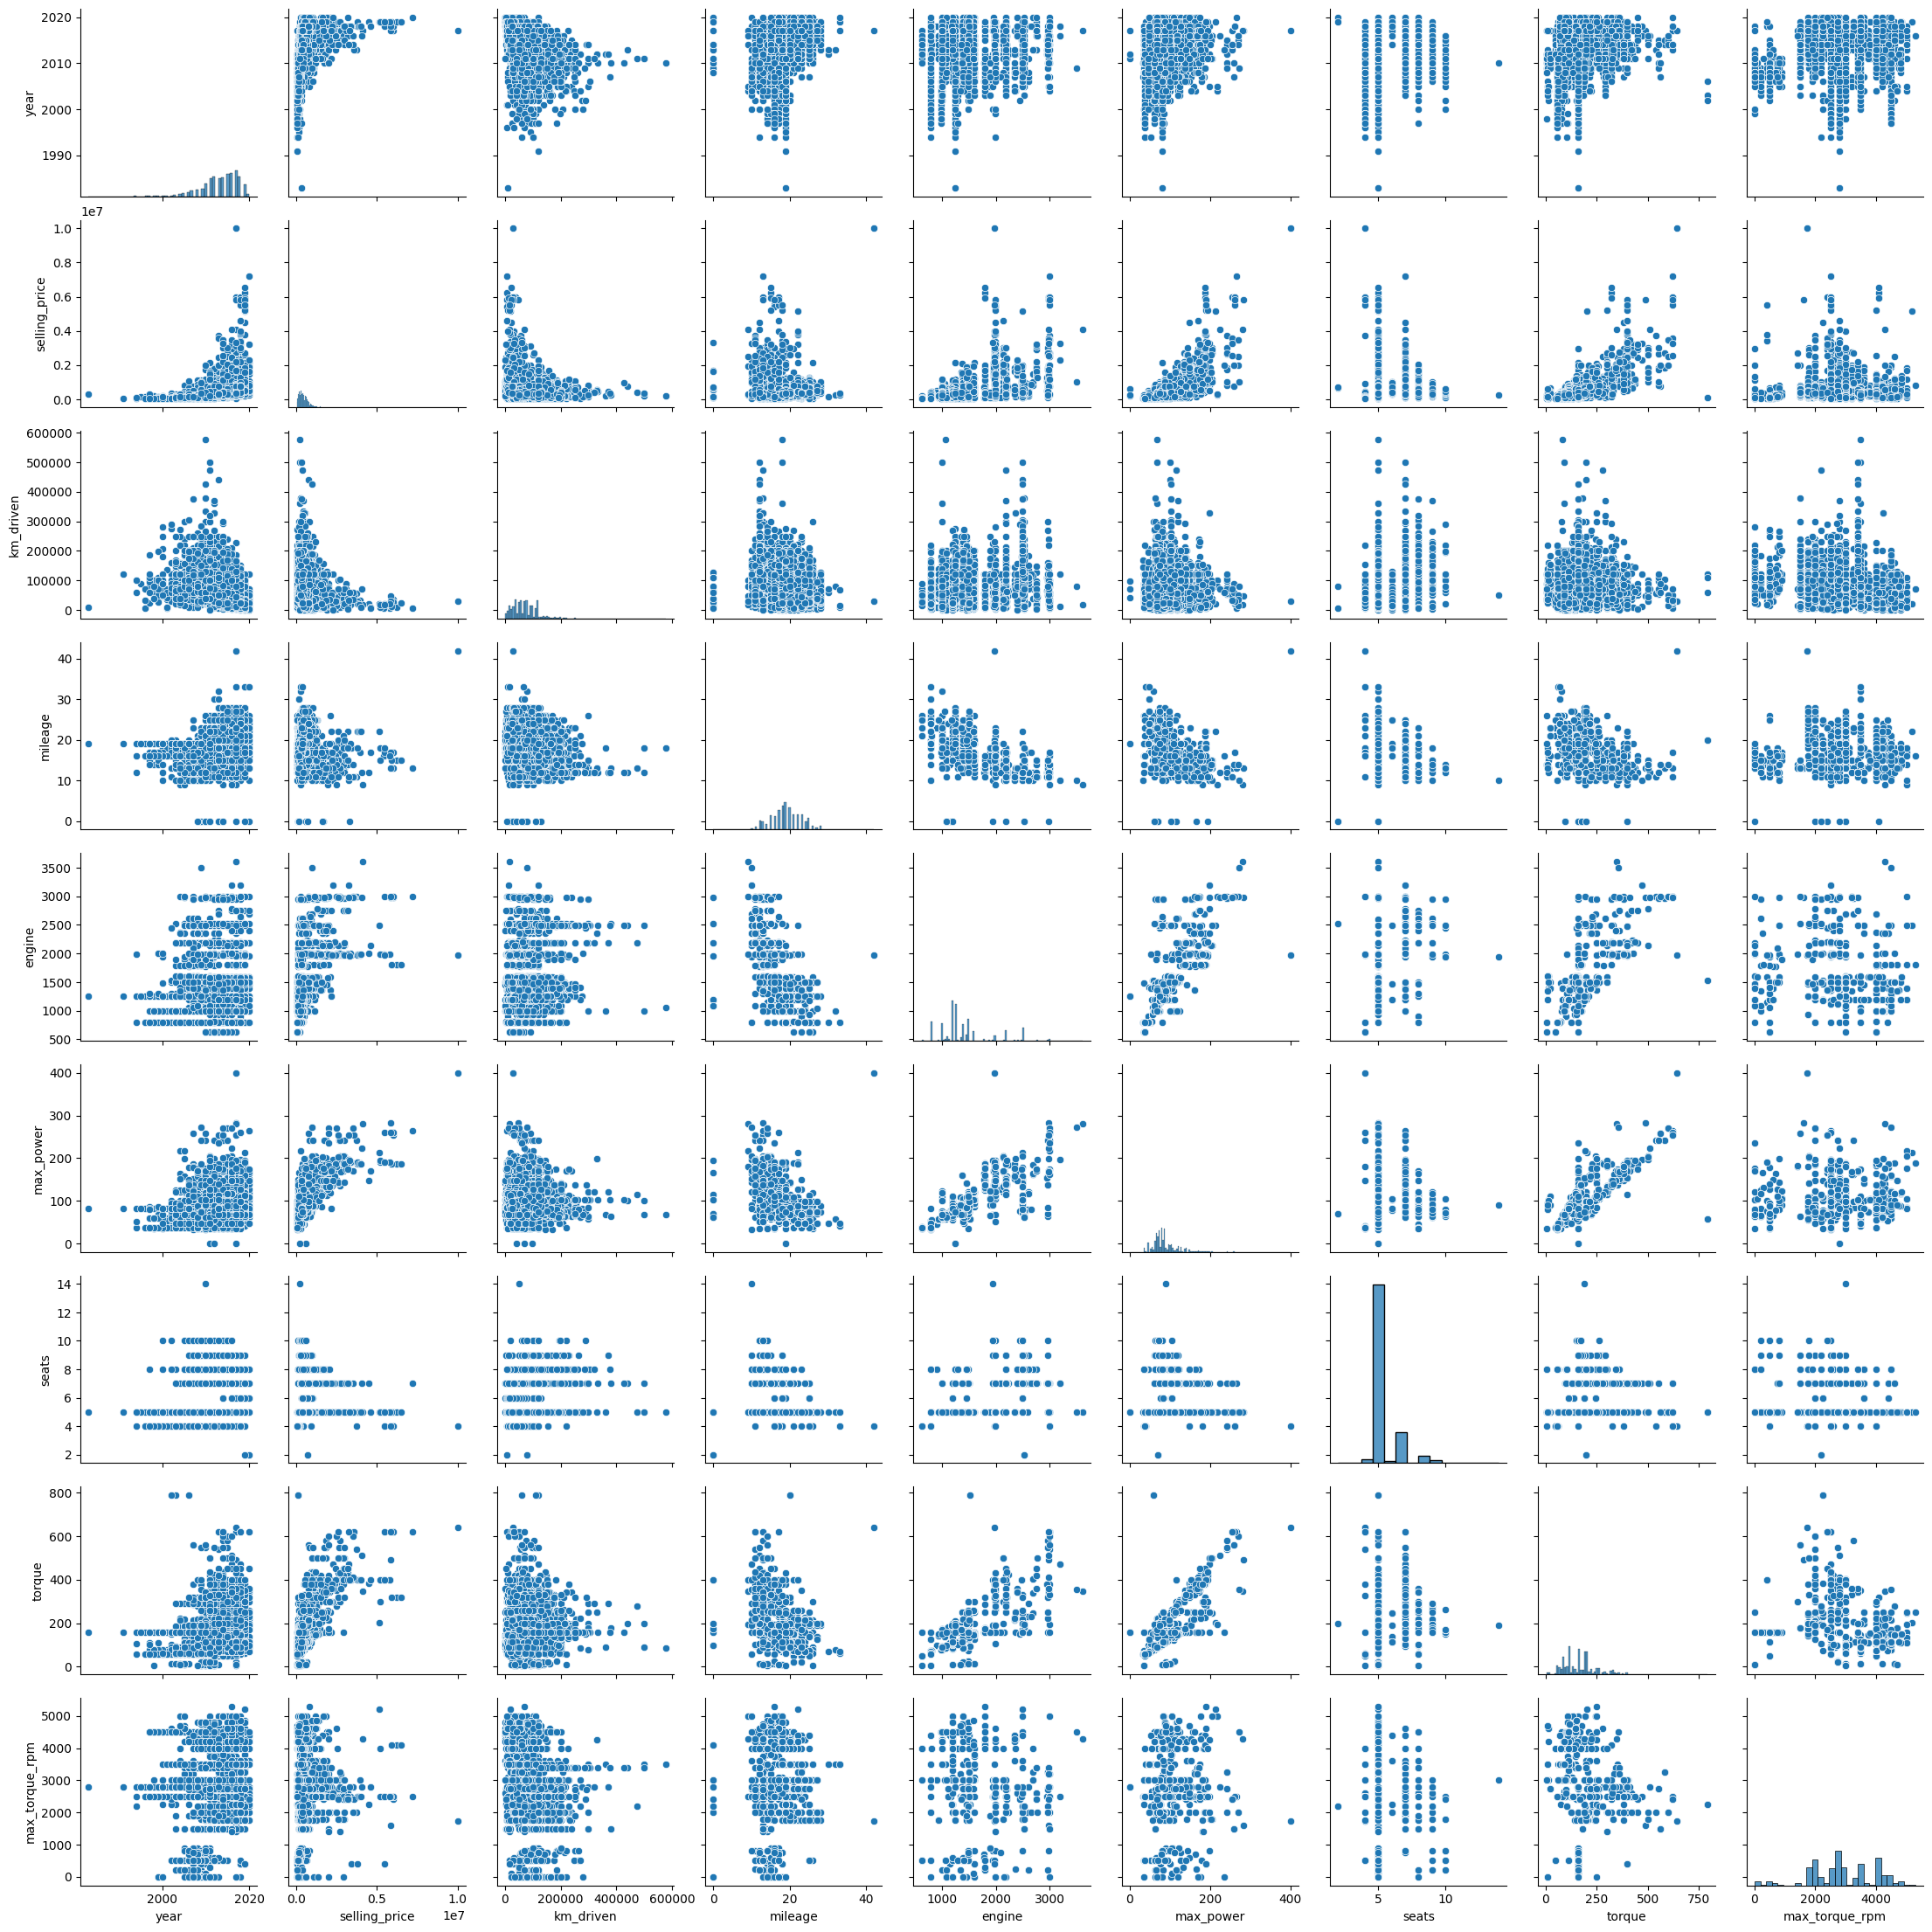

In [ ]:
# удаляем выбросы
df_train_no_out = df_train_fixed.drop(df_train_fixed.sort_values(by = ['km_driven'], ascending=False).head(2).index, axis=0)
sns.pairplot(df_train_no_out)
plt.show()

**Ответ:** теперь мы можем более однозначно проинтерпретировать взаимосвязи. С целевой переменной положительно связаны: год производства автомобиля, объем двигателя, максимальная мощность и частота оборотов двигателя. Отрицально с ценой связан показатель km_driven

Также, если рассматривать корреляцию между признаками, то среди наиболее связанных друг с другом признаков можно выделить: объем дивагетеля - кол-во оборотов - максимальная мощность

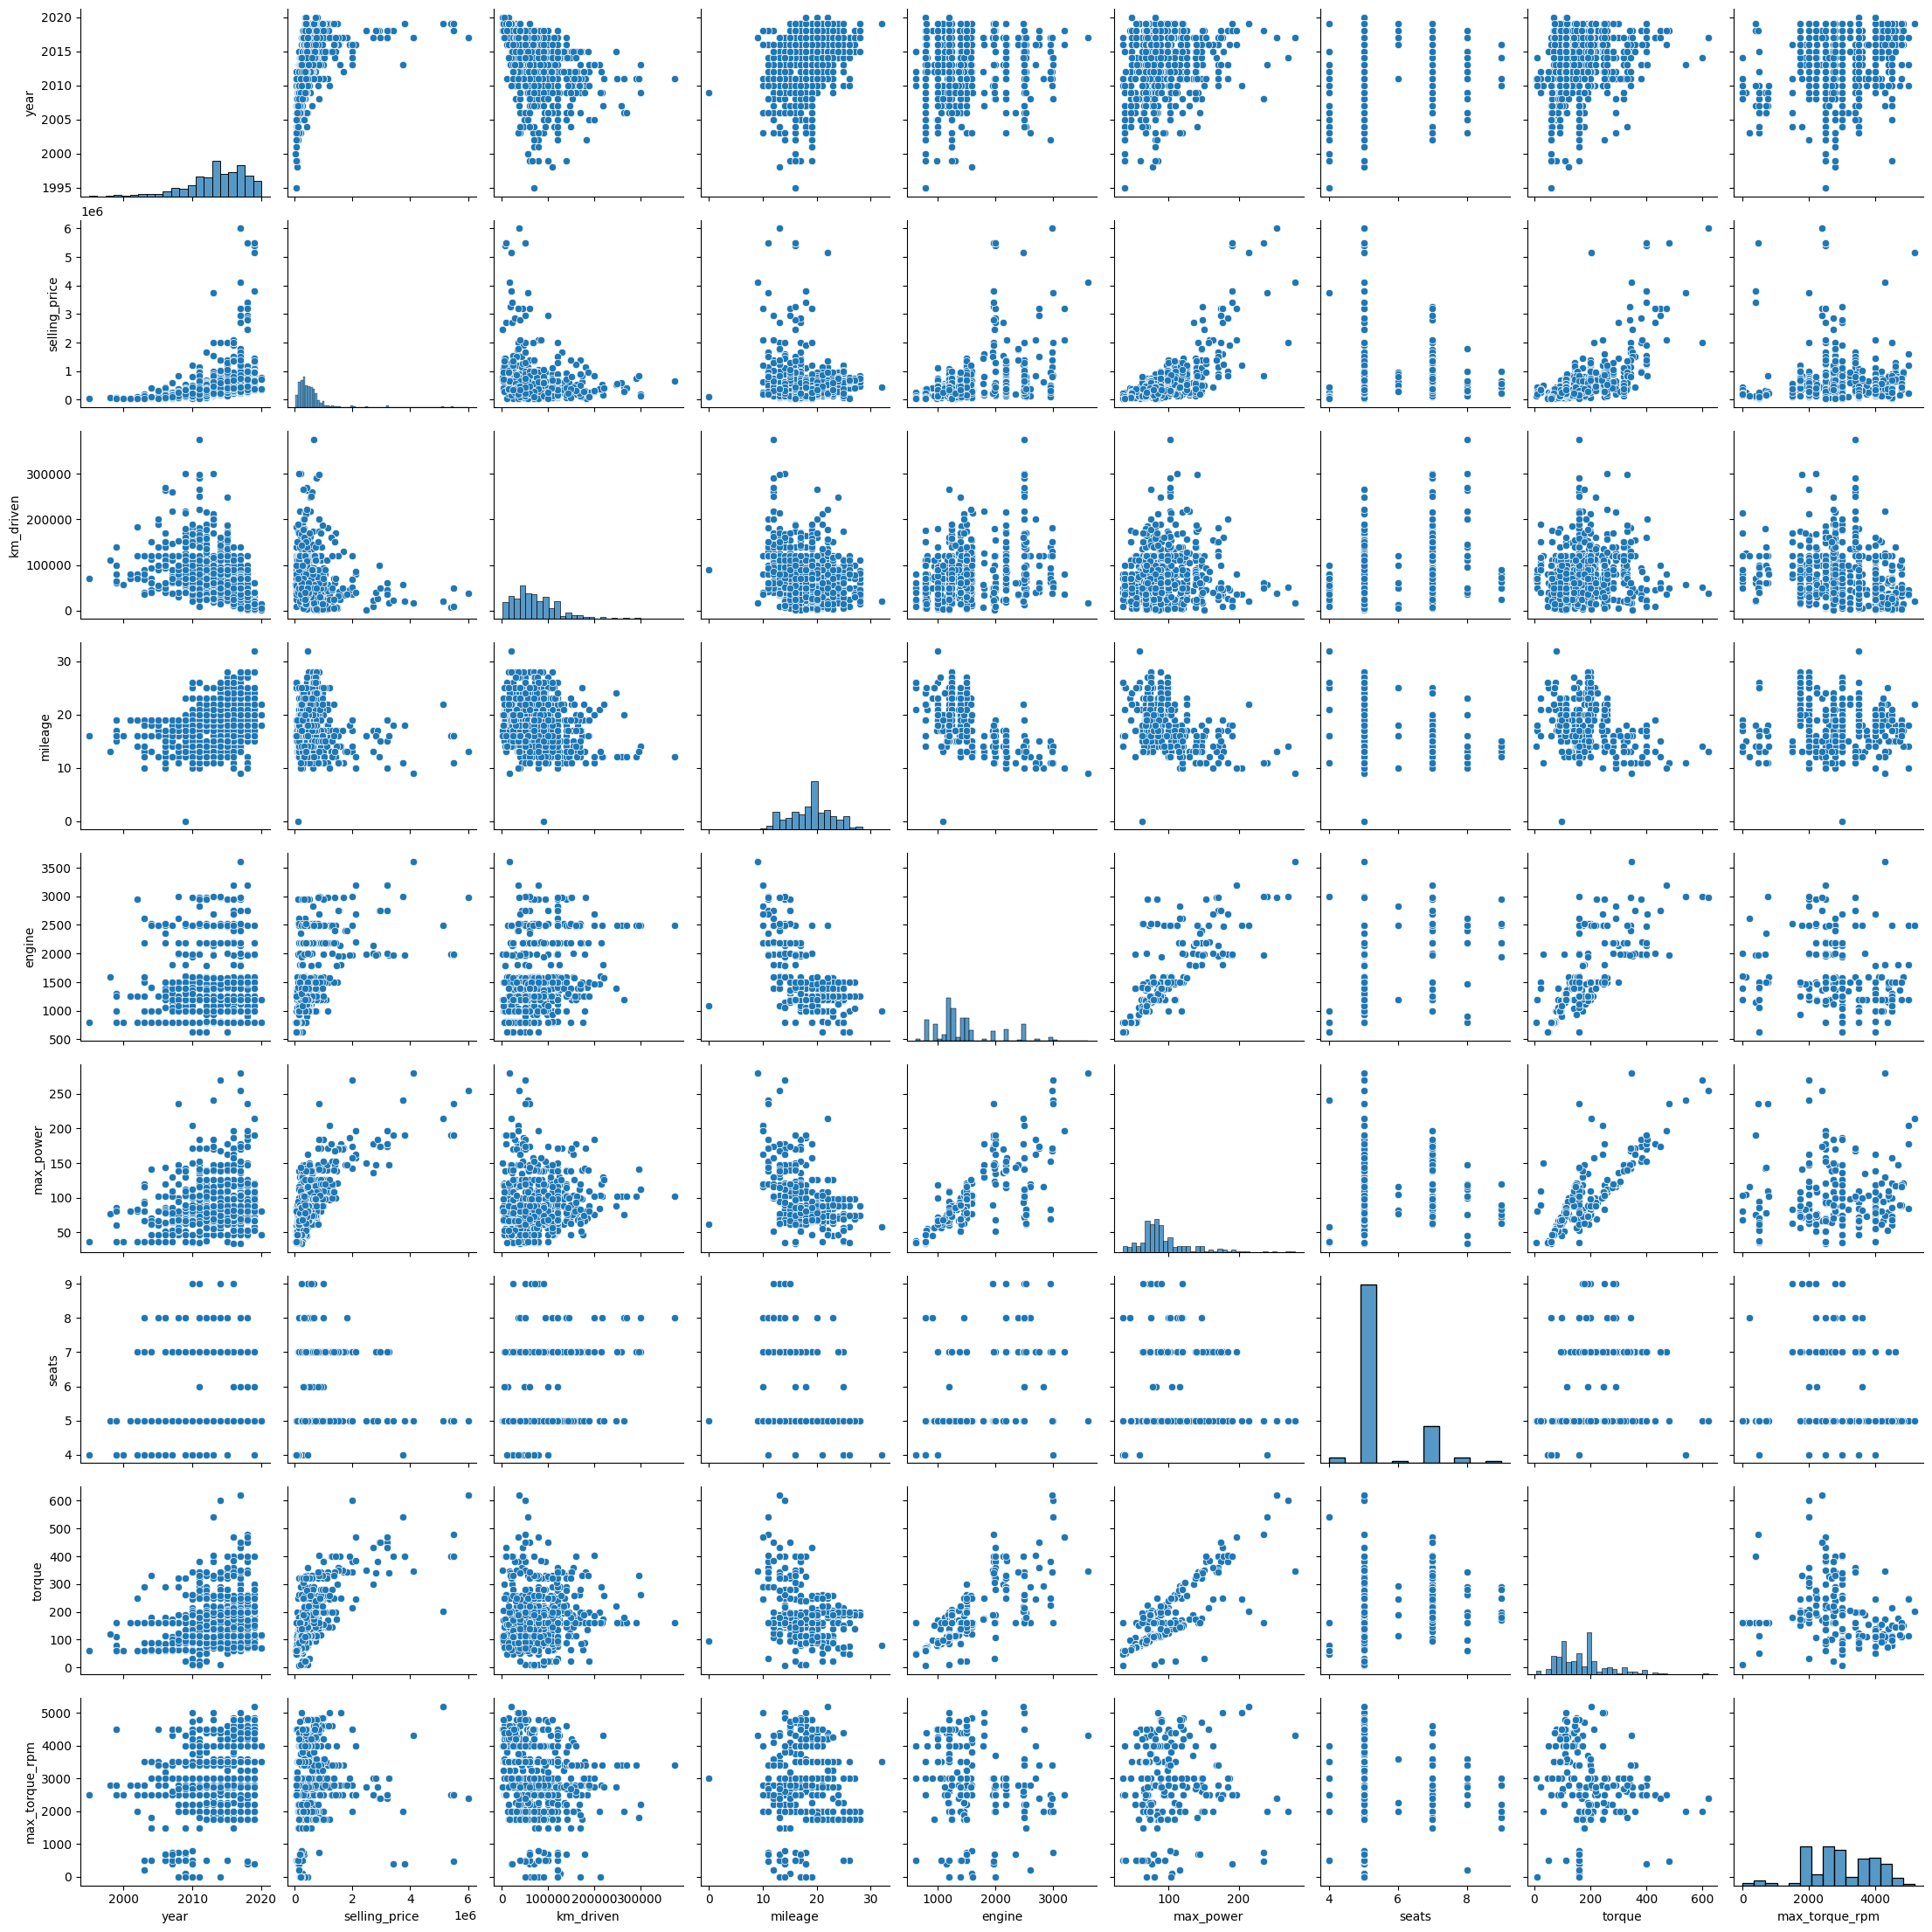

In [ ]:
# step 2 test data


sns.pairplot(df_test_fixed)
plt.show()

**Ответ:** В тестовой выборки взаимосвязи похожие на тренировочную

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

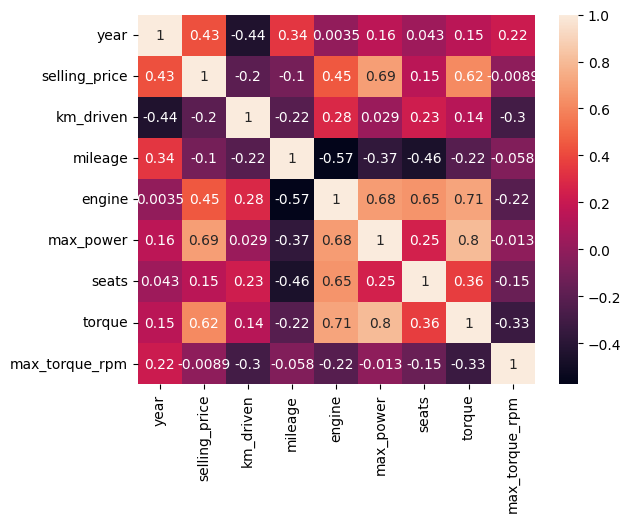

In [ ]:
sns.heatmap(df_train_no_out.select_dtypes(include=["number"]).corr(), annot=True)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ:** наименее скоррелироваными признакми являются объем двигателя и год выпуска автомобиля

Сильная положительная корреляция наблюдается между всеми параметрами двигателя - максимальная мощность, объемы и обороты, а также между ценой автомобиля и параметрами двигателя

Да, из-за того, что между годом и пробегом есть отрицательная корреляция, можно утверждать, что чем меньше год выпуска автомобиля, тем больше он проехал


### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [ ]:
from scipy.stats import spearmanr

def spearman_correlation(x, y):
    x_rank = np.argsort(np.argsort(x))
    y_rank = np.argsort(np.argsort(y))

    n = len(x)
    covariance = np.mean(x_rank * y_rank) - np.mean(x_rank) * np.mean(y_rank)
    standard_deviation_x = np.std(x_rank)
    standard_deviation_y = np.std(y_rank)
    correlation = covariance / (standard_deviation_x * standard_deviation_y)

    return correlation

# сравниваем корреляции
custom_spearman = spearman_correlation(df_train_no_out['year'],  df_train_no_out['km_driven'])
print(custom_spearman)
# Результат библиотечной функции
library_spearman, _ = spearmanr(df_train_no_out['year'],  df_train_no_out['km_driven'])
print(f"Library Spearman correlation: {library_spearman}")

-0.5705518667706977
Library Spearman correlation: -0.5732738696294838


Рукописная функция выдает практически идентичный результат, есть небольшая погрешность

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


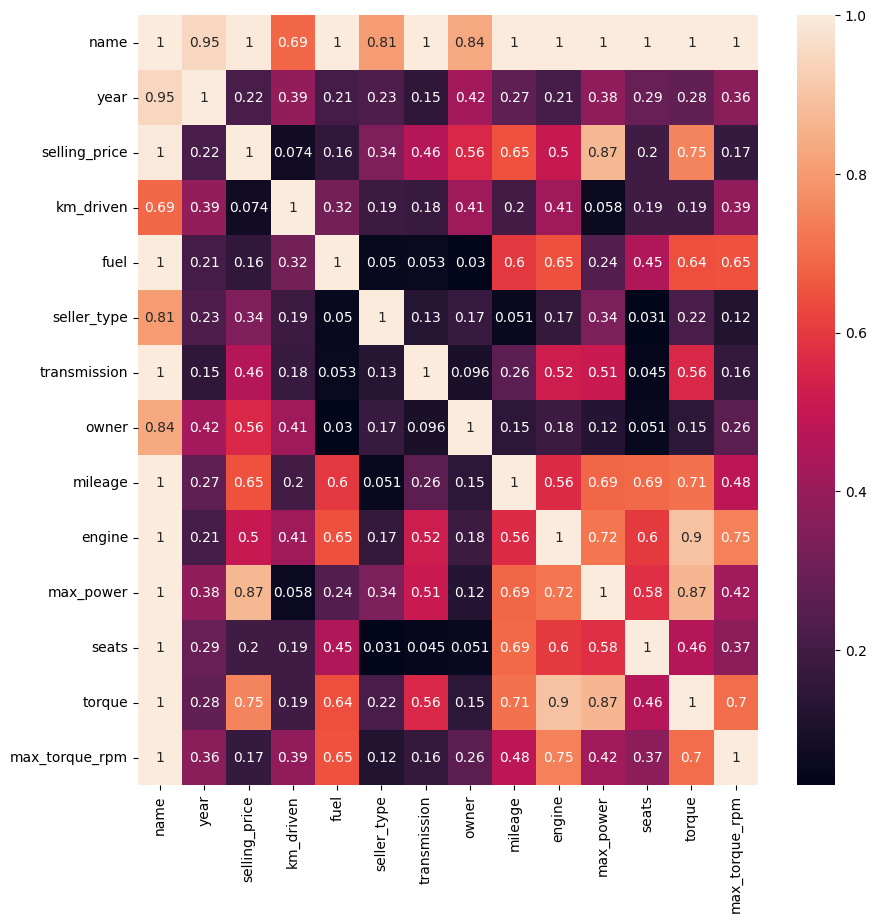

In [ ]:
# # смотрим на phik корреляцию
# !pip install phik
from phik import resources, report
phik_corr = df_train_no_out.phik_matrix()


plt.figure(figsize=(10, 10))
sns.heatmap(phik_corr, annot=True)
plt.show()

**Ответ:** здесь можно сделать похожие выводы с теми, что были сделаны ранее - показатели двигателя сильно зависят друг от друга и при этом связаны с ценой. Однако кроме этого с целевой переменной связана еще одна величина - кол-во владельцев автомобиля, которую до этого мы упускали из-за того, что она категориальная

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
y_train = df_train_no_out['selling_price']
X_train = df_train_no_out.drop('selling_price', axis=1).select_dtypes(['number'])

In [ ]:
X_train

year  km_driven  mileage  engine  max_power  seats  torque  \
0     2014     145500     23.0    1248       74.0      5  190.00   
1     2014     120000     21.0    1498      103.0      5  250.00   
2     2010     127000     23.0    1396       90.0      5   22.40   
3     2007     120000     16.0    1298       88.0      5  160.00   
4     2017      45000     20.0    1197       81.0      5  113.75   
...    ...        ...      ...     ...        ...    ...     ...   
6009  2008     191000     17.0    1086       62.0      5   96.10   
6010  2013      50000     18.0     998       67.0      5   90.00   
6011  2013     110000     18.0    1197       82.0      5  113.70   
6012  2007     119000     16.0    1493      110.0      5  160.00   
6013  2009     120000     19.0    1248       73.0      5  190.00   

      max_torque_rpm  
0             2000.0  
1             2500.0  
2             2750.0  
3              500.0  
4             4000.0  
...              ...  
6009          3000.0  
6010          3500.0  
6011          4000.0  
6012           750.0  
6013          2000.0  

[6012 rows x 8 columns]

In [ ]:
y_test = df_test_fixed['selling_price']
X_test = df_test_fixed.drop('selling_price', axis=1).select_dtypes(['number'])

In [ ]:
X_test

year  km_driven  mileage  engine  max_power  seats  torque  \
0    2010     168000     14.0    2498      112.0      7  260.00   
1    2017      25000     21.0    1497      108.0      5  260.00   
2    2007     218463     12.0    1799      130.0      5  172.00   
3    2015     173000     25.0    1498       98.0      5  200.00   
4    2011      70000     16.0    1172       65.0      5   96.00   
..    ...        ...      ...     ...        ...    ...     ...   
995  2008     100000     19.0    1086       68.0      5   99.04   
996  2017      50000     18.0    1197       81.0      5  114.70   
997  2009      40000     23.0    1396       90.0      5   22.40   
998  2012      25000     20.0    1197       78.0      5  111.80   
999  2016     110000     26.0    1498       98.0      5  200.00   

     max_torque_rpm  
0            2200.0  
1            2750.0  
2            4300.0  
3            1750.0  
4            3000.0  
..              ...  
995          4500.0  
996          4000.0  
997          2750.0  
998          4000.0  
999          1750.0  

[1000 rows x 8 columns]

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 112233906295.94087
MSE test: 224545268045.69412
R2 train: 0.35050285242129664
R2 test: -0.06900869841230972


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [ ]:
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_mean) ** 2)

    r2 = 1 - ss_res / ss_tot
    return r2

**Ответ:** коэффициент детерминации можно интерпретировать как долю объясненной дисперсии. Считается по формуле, в которой используется SS res - сумма квадратов остатков регрессии (разность истинного значения и предсказания) и SS total - общая сумма квадратов (разность истинного значения и среднего значения)

In [ ]:
#проверка

print(f'Original function: {r2_score(y_train_pred, y_train)}')
print(f'Custom function: {r_squared(y_train_pred, y_train)}')

Original function: 0.35050285242129664
Custom function: 0.35050285242129664


Значения идентичны - функция написана правильно

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def adjusted_r2_score(y, y_pred, X):
    n = X.shape[0]
    p = X.shape[1]

    # Вычисление R-squared
    r2 = r_squared(y, y_pred)

    # Вычисление adjusted R-squared
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [ ]:
#проверяем
adjusted_r2_score(y_train_pred, y_train, X_train)


0.3496372890062326

**Ответ:** Adjusted R2 применяется в случаях, когда мы хотим штрафовать модель за большее кол-во параметров. Особенно разница между обычным R2 и скоректированным будет в случае, когда у датасета недостаточно наблюдений

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
#смотрим на признаки
print(X_train_scaled)
print(X_test_scaled)

[[ 0.13512649  1.49395318  0.99117781 ... -0.43282252  0.25371568
  -0.87157204]
 [ 0.13512649  0.96742938  0.49174681 ... -0.43282252  0.96618556
  -0.38886749]
 [-0.84541723  1.11196533  0.99117781 ... -0.43282252 -1.7364502
  -0.14751522]
 ...
 [-0.11000944  0.76094946 -0.25739969 ... -0.43282252 -0.65230853
   1.05924616]
 [-1.58082502  0.94678139 -0.75683069 ... -0.43282252 -0.10251927
  -2.07833341]
 [-1.09055316  0.96742938 -0.00768419 ... -0.43282252  0.25371568
  -0.87157204]]
[[-0.84541723  1.958533   -1.25626169 ...  1.61046685  1.08493054
  -0.67849022]
 [ 0.87053428 -0.99412985  0.49174681 ... -0.43282252  1.08493054
  -0.14751522]
 [-1.58082502  3.00049261 -1.75569269 ... -0.43282252  0.03997471
   1.34886889]
 ...
 [-1.09055316 -0.68440997  0.99117781 ... -0.43282252 -1.7364502
  -0.14751522]
 [-0.35514537 -0.99412985  0.24203131 ... -0.43282252 -0.67487007
   1.05924616]
 [ 0.62539835  0.76094946  1.74032431 ... -0.43282252  0.37246066
  -1.11292432]]


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 112233906295.94124
MSE test: 224545268045.69275
R2 train: 0.35050285242130264
R2 test: -0.06900869841229373


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
names = list(X_test.columns)
pd.DataFrame(model.coef_, index = names, columns = ['value']).sort_values(by=['value'])

value
km_driven       -70088.812601
seats           -29715.489903
max_torque_rpm  -24916.985228
mileage          -7184.018443
engine           23839.793763
torque           88713.236986
year            151455.300001
max_power       264441.601077

**Ответ**: самый значимый фактор для предсказания цены - мощность двигателя, он имеет самое большое как абсолютное так и относительное значение коэффициента. Так же из наиболее значимых факторов можно выделить год выпуска и обороты двигателя

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 112233906309.56621
MSE test: 224546035078.8447
R2 train: 0.35049791595497415
R2 test: -0.06902100474005524


**Ответ:** качество модели практически не поменялось

In [ ]:
names = list(X_test.columns)
pd.DataFrame(model.coef_, index = names, columns = ['value']).sort_values(by=['value'])

value
km_driven       -70087.843209
seats           -29711.607768
max_torque_rpm  -24915.065763
mileage          -7180.991819
engine           23837.429758
torque           88712.859449
year            151452.941038
max_power       264443.060903

**Ответ:** веса модели также практически не поменялись, поэтому нет весов, которые занулились

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = Lasso(max_iter=10000)

param_grid = {
    'alpha': [i for i in range(0, 10000, 100)]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring=make_scorer(r2_score), verbose=0)
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.458e+14, tolerance: 1.262e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

{'alpha': 9900}

In [ ]:
model = Lasso(alpha=9900)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 113018645879.8742
MSE test: 232603366942.76263
R2 train: 0.297152381289404
R2 test: -0.1954027460496841


In [ ]:
names = list(X_test.columns)
pd.DataFrame(model.coef_, index = names, columns = ['value']).sort_values(by=['value'])

value
km_driven       -59827.879517
max_torque_rpm   -8885.385918
seats            -1919.867760
mileage              0.000000
engine               0.000000
torque           91676.424619
year            138371.261892
max_power       266213.373667

**Ответ:**
1. Всего моделей было обучено: 100 * 10 - кол-во уникадьных значений гиперпараметров и количество кросс валидаций
2. Для gridsearch был заполнен только параметр alpha в params_grid. Этот параметр отвечает за коэффициент регуляризации, т.е. с каким весом будет учитываться масштаб параметров в ошибке
3. Занулились веса перед параметрами: объем двигателя и километраж, лучший коэф регуляризации - 9900

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()

param_grid = {
    'alpha': [i for i in range(0, 10000, 100)],
    'l1_ratio': [i / 10 for i in range(0, 11, 1)]
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring=make_scorer(r2_score), verbose=0)
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.458e+14, tolerance: 1.262e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

{'alpha': 9900, 'l1_ratio': 1.0}

In [ ]:
model = ElasticNet(alpha=9900, l1_ratio = 1)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 113018645879.8742
MSE test: 232603366942.76263
R2 train: 0.297152381289404
R2 test: -0.1954027460496841


**Ответ:** в этом случае гридсеарчу пришлось изучать в 10 раз больше моделей, т.к. итерация проиходила еще и по l1_ratio параметру

Лучшие гиперпараметры: alpha - 9900, l1_ratio - 1

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
from sklearn.feature_selection import SelectFromModel

base_model = LinearRegression()

# веберем наиболее важные признаки жадным алгоритмом
selector = SelectFromModel(base_model, prefit=False, threshold='mean')
selector.fit(X_train_scaled, y_train)
selector.get_feature_names_out()

array(['x0', 'x4', 'x6'], dtype=object)

In [ ]:
#выбираем необходимые признаки

X_train.columns[[0, 4, 6]]

Index(['year', 'max_power', 'torque'], dtype='object')

In [ ]:
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

model = Lasso(max_iter=10000)

param_grid = {
    'alpha': [i for i in range(0, 10000, 100)]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring=make_scorer(r2_score), verbose=0)
grid_search.fit(X_train_selected, y_train)
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.551e+14, tolerance: 1.262e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

{'alpha': 9900}

In [ ]:
model = Lasso(alpha=9900)
model.fit(X_train_selected, y_train)
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 116770994649.11887
MSE test: 243288208833.49057
R2 train: 0.2614455332563085
R2 test: -0.2707342227761147


**Ответ:** селекция признаков не дала значимого прироста в качестве

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



In [ ]:
X_test = pd.get_dummies(df_test_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission']).drop(['name', 'selling_price'], axis=1)
X_train = pd.get_dummies(df_train_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission']).drop(['name', 'selling_price'], axis=1)
y_test = pd.get_dummies(df_test_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission'])['selling_price']
y_train = pd.get_dummies(df_train_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission'])['selling_price']

Стандартизуем

In [ ]:
scaler_X = StandardScaler()
scaler_X.fit(X_train.select_dtypes(['number']))

X_train_scaled = np.array(pd.concat([pd.DataFrame(scaler_X.transform(X_train.select_dtypes(['number']))), X_train.select_dtypes(['bool'])], axis=1))
X_test_scaled = np.array(pd.concat([pd.DataFrame(scaler_X.transform(X_test.select_dtypes(['number']))), X_test.select_dtypes(['bool'])], axis=1))

Обучаем

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 97266698385.41777
MSE test: 211200202918.20483
R2 train: 0.4817248441503079
R2 test: 0.12883509950241123


In [ ]:
names = list(X_test.columns)
pd.DataFrame(model.coef_, index = names, columns = ['value']).sort_values(by=['value'])

value
transmission_Manual          -2.955665e+05
seller_type_Individual       -1.122758e+05
seller_type_Trustmark Dealer -1.108652e+05
fuel_Diesel                  -9.326395e+04
owner_Second Owner           -5.903996e+04
owner_Third Owner            -5.266224e+04
owner_Fourth & Above Owner   -4.555918e+04
max_torque_rpm               -3.594500e+04
km_driven                    -3.179738e+04
fuel_Petrol                  -1.338664e+04
seats                        -1.326764e+04
mileage                       1.877209e+04
engine                        3.654830e+04
fuel_LPG                      8.180937e+04
torque                        1.111679e+05
year                          1.402345e+05
max_power                     2.058737e+05
owner_Test Drive Car          3.293409e+06

**Ответ:** с категориальными переменными модель стала показывать более хорошее качество и на тесте и на трейне, попробуем в регуляризацию. Также при добавлении категориальных фичей стало видно что наибольшими абсолютными значениями обладают именно они - флаг того, что машина только после тест драйва, флаг ручной коробки передач



In [ ]:
# добавим регуляризации и посмотрим качество

model = Lasso(max_iter=10000)

param_grid = {
    'alpha': [i for i in range(0, 10000, 100)]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, scoring=make_scorer(r2_score), verbose=0)
grid_search.fit(X_train, y_train)
grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.065e+14, tolerance: 1.262e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

{'alpha': 1700}

In [ ]:
model = Lasso(alpha=1700)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'MSE train: {MSE(y_train_pred, y_train)}')
print(f'MSE test: {MSE(y_test_pred, y_test)}')

print(f'R2 train: {r2_score(y_train_pred, y_train)}')
print(f'R2 test: {r2_score(y_test_pred, y_test)}')

MSE train: 101961258397.62425
MSE test: 202651907743.22958
R2 train: 0.42339332240826444
R2 test: 0.11984069746492865


In [ ]:
names = list(X_test.columns)
pd.DataFrame(model.coef_, index = names, columns = ['value']).sort_values(by=['value'])

value
transmission_Manual          -288191.569331
seller_type_Individual       -107985.479523
fuel_Diesel                   -48045.868254
owner_Second Owner            -43820.027935
km_driven                     -32933.603554
max_torque_rpm                -29460.330180
owner_Third Owner             -18198.614538
seats                         -10685.292244
fuel_LPG                           0.000000
fuel_Petrol                        0.000000
seller_type_Trustmark Dealer      -0.000000
owner_Fourth & Above Owner        -0.000000
mileage                         7624.034925
engine                         18570.310380
torque                        103078.176204
year                          146502.602357
max_power                     218257.784623
owner_Test Drive Car          735027.125108

После регуляризации качество на тесте подросло, при это занулились некоторые коэффициенты, это значит, что до регуляризации модель переобучалась на большом количестве данных

### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
df_train_no_out['name'].apply(lambda x: x.split(' ')[0]).value_counts()

name
Maruti           1886
Hyundai          1082
Mahindra          628
Tata              544
Honda             317
Toyota            314
Ford              313
Chevrolet         192
Renault           179
Volkswagen        157
Nissan             63
Skoda              61
Datsun             51
Mercedes-Benz      44
BMW                42
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Jaguar              8
Volvo               8
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: count, dtype: int64

Кажется если вынуть только первое слово, то получится осмысленное название марки автомобиля

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_train_final = df_train_fixed.copy()
df_train_final['name'] = df_train_final['name'].apply(lambda x: x.split(' ')[0])
df_train_final['seats'] = df_train_final['seats'].apply(lambda x: str(x))

df_test_final = df_test_fixed.copy()
df_test_final['name'] = df_test_final['name'].apply(lambda x: x.split(' ')[0])
df_test_final['seats'] = df_test_final['seats'].apply(lambda x: str(x))

df_train_fixed['name'].apply(lambda x: x.split(' ')[0]).value_counts()

X_test = pd.get_dummies(df_test_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission']).drop(['name', 'selling_price'], axis=1)
X_train = pd.get_dummies(df_train_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission']).drop(['name', 'selling_price'], axis=1)
y_test = pd.get_dummies(df_test_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission'])['selling_price']
y_train = pd.get_dummies(df_train_fixed, drop_first=True, columns=['fuel', 'seller_type', 'owner', 'transmission'])['selling_price']

scaler_X = StandardScaler()
scaler_X.fit(X_train.select_dtypes(['number']))

X_train_scaled = np.array(pd.concat([pd.DataFrame(scaler_X.transform(X_train.select_dtypes(['number']))), X_train.select_dtypes(['bool'])], axis=1))
X_test_scaled = np.array(pd.concat([pd.DataFrame(scaler_X.transform(X_test.select_dtypes(['number']))), X_test.select_dtypes(['bool'])], axis=1))



### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Корректная работа с OHE требует применения преобразований с теми же параметрами к обучающим и тестовым данным

2. Чтобы не создавать мультиколлинеарности один признак удаляют

3. Удаление OHE-признаков, признанных неважными для модели, может быть целесообразным для уменьшения размерности, но следует делать это, проверяя влияние на качество модели и её интерпретируемость.


### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
# сохраняем веса модели
import joblib

df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_train['torque_copy'] = df_train['torque']
df_test['torque_copy'] = df_test['torque']
del df_train['torque']
del df_test['torque']

df_train_fixed = fix_ds(df_train)
df_test_fixed = fix_ds(df_test)
X_train = df_train_fixed[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']]
y_train = df_train_fixed['selling_price']

X_test = df_test_fixed[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']]
y_test = df_test_fixed[['selling_price']]

mis = X_train.columns[X_train.isnull().any()].tolist()
for col in mis:
  med = X_train[col].median()
  X_train[col] = X_train[col].fillna(med)
  X_train[col] = X_train[col].fillna(med)


model = LinearRegression()
model.fit(X_train, y_train)


# # Сохранение модели
joblib.dump(model, 'model_weights.pkl')

# # Загрузка модели
# loaded_model = joblib.load('model_weights.pkl')

<ipython-input-188-c434e17ced34>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(med)
<ipython-input-188-c434e17ced34>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(med)


['model_weights.pkl']

In [ ]:

from fastapi import FastAPI, UploadFile, File
from fastapi.responses import FileResponse
from pydantic import BaseModel
import numpy as np
import joblib
from typing import List
import pandas as pd
import re

import re
def extract_number_from(value):
    if pd.notnull(value):
        result = re.search(r'(\d+)', value)
        if result is not None:
            return int(result.group(0))
    return np.nan

def parse_torque(value):
  if pd.isnull(value):
        return np.nan, np.nan
  torque_match = re.search(r'(\d+\.?\d*)\s*(?:Nm|kgm)', value, re.IGNORECASE)
  if torque_match:
      torque = float(torque_match.group(1))
  else:
      torque = np.nan

  rpm_match = re.search(r'(\d+)(?!.*\d)', value, re.IGNORECASE)
  if rpm_match:
    max_torque_rpm = int(rpm_match.group(1).replace(',', ''))

  else:
      max_torque_rpm = np.nan

  return torque, max_torque_rpm


app = FastAPI()
model = joblib.load('model_weights.pkl')

# Пример класса объекта автомобиля
class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]


def process_item(self) -> List[float]:
  torque, max_torque_rpm = parse_torque(self.torque)
  mileage = extract_number_from(self.mileage)
  engine = extract_number_from(self.engine)
  max_power = extract_number_from(self.max_power)

  vector = [[
      self.year,
      self.km_driven,
      mileage,
      engine,
      max_power,
      torque,
      max_torque_rpm,
      self.seats
  ]]

  return vector



def predict(item: Item) -> float:
    try:
        prediction = model.predict(process_item(item))
        return prediction
    except:
        pass



@app.post("/predict_item")
def predict_item(item: Item) -> float:
    prediction = predict(item)
    return prediction

@app.post("/predict_items")
def predict_items(items: Items) -> List[float]:
    predictions = [predict(item) for item in items.objects]
    return predictions

@app.post("/predict_from_csv")
async def predict_from_csv(file: UploadFile = File(...)) -> FileResponse:
    df = pd.read_csv(file.file)
    mis = df.columns[df.isnull().any()].tolist()
    for col in mis:
        med = df[col].median()
        df[col] = df[col].fillna(med)
    predictions = []
    for index, row in df.iterrows():
        item = Item(**row)
        prediction = predict(item)
        predictions.append(prediction)

    df['Predicted_Price'] = predictions

    # Записать выходной файл CSV
    output_file = "predictions.csv"
    df.to_csv(output_file, index=False)

    return FileResponse(output_file, filename="predictions_with_prices.csv")

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>